In [442]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import rc
import missingno as msno #for missing values image
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [443]:
dota = pd.read_csv(r'C:\Users\jason\Desktop\dota2_survey.csv', sep=',') #5k rows

In [444]:
dota.head(3)

,Timestamp,age,server,gender,years_dota2,games_week,badge,behaviour,solo_party,unranked_ranked,...,rate_this_week_learned,rate_stupid_questions,Unnamed: 42,show_case_badge,"Miscellaneous Feedback - Good things, bad things, anything!",follow_dota_esports,favorite_team,other_esports,follow_twitter,on_discord
0,1/13/2019 5:19:23,19-22,US East,Male,3 - 5 years,6 - 10,Legend,Normal,1.0,5.0,...,Like em,Like em,NaN,It shouldn't be done at all,pls fire vcrkid,I watch some events and the highlights for the...,Evil Geniuses,Starcraft,"I don't follow, becuase I don't use twitter or...",I'm in the server and participate regularly
1,1/13/2019 5:40:49,23-29,US West,Male,5 - 10 years,0 - 1 (play less than a game a week but still ...,Divine,A,2.0,2.0,...,Like em,Like em,NaN,It shouldn't be done at all,NaN,I only watch The International,Team Liquid,Counter Strike: Global Offensive,"I don't follow, because it's too spammy",I'm in the server and participate sometimes
2,1/13/2019 10:26:10,30-40,Europe East,Male,5 - 10 years,0 - 1 (play less than a game a week but still ...,Legend,Normal,2.0,3.0,...,Okay,Okay,NaN,It should only be allowed for Immortal players,NaN,I watch some events and the highlights for the...,Alliance,NaN,"I don't follow, becuase I don't use twitter or...",I'm in the server and participate regularly


## EDA

### Basic Info

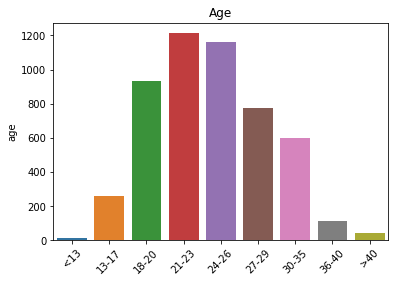

In [445]:
ages = dota.age.value_counts()

sns.barplot(x= ages.index, y=ages, order=['<13', '13-17', '18-20', '21-23', '24-26', '27-29', '30-35', '36-40', '>40'])
plt.title('Age')
plt.xticks(rotation=45);

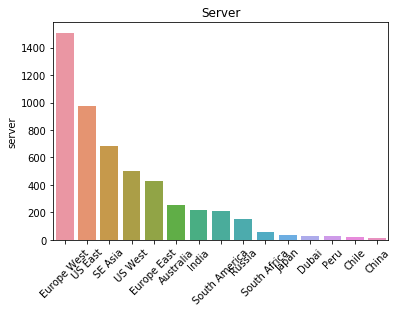

In [446]:
server = dota.server.value_counts()

sns.barplot(x=server.index, y=server)
plt.title('Server')
plt.xticks(rotation=45);

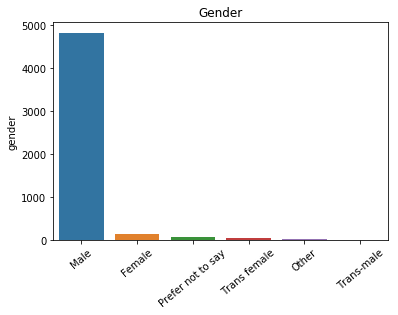

In [447]:
gender = dota.gender.value_counts()

sns.barplot(x=gender.index, y=gender)
plt.title('Gender')
plt.xticks(rotation=40);

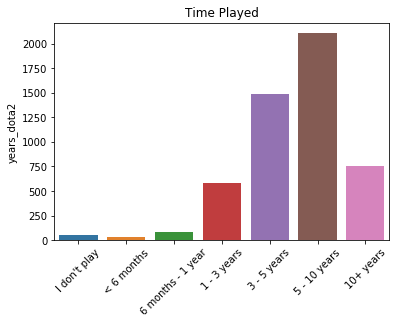

In [448]:
years_dota2 = dota.years_dota2.value_counts()

sns.barplot(x=years_dota2.index, y=years_dota2, 
            order=['I don\'t play', '< 6 months', '6 months - 1 year', '1 - 3 years', '3 - 5 years', '5 - 10 years', '10+ years'])
plt.title('Time Played')
plt.xticks(rotation=45);

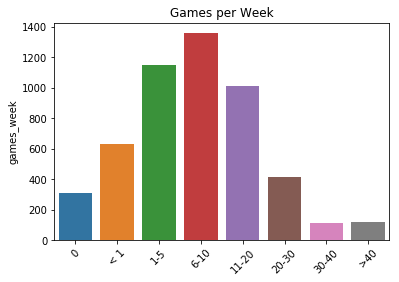

In [449]:
games_week = dota.games_week.value_counts()

fig, ax=plt.subplots()
sns.barplot(x=games_week.index, y=games_week, order=['0', '0 - 1 (play less than a game a week but still play)', '1 - 5', '6 - 10', '11 - 20', '20 - 30', '30 - 40', '> 40'])
plt.title('Games per Week')
plt.xticks(np.arange(8), ['0', '< 1', '1-5', '6-10', '11-20', '20-30', '30-40', '>40'], rotation=45);

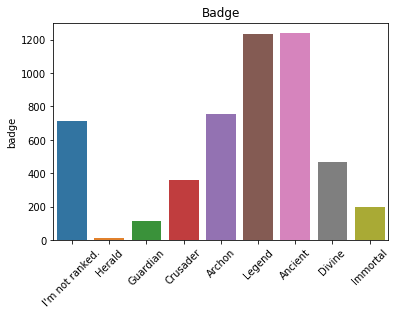

In [450]:
badge = dota.badge.value_counts()

sns.barplot(x=badge.index, y=badge, order=['I\'m not ranked.', 'Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal'])
plt.title('Badge')
plt.xticks(rotation=45);

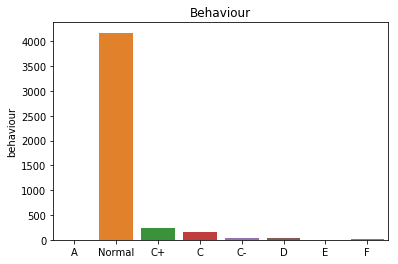

In [451]:
behaviour=dota.behaviour.value_counts() # Ask cody for explanation

sns.barplot(x=behaviour.index, y=behaviour, order=['A', 'Normal', 'C+', 'C', 'C-', 'D', 'E', 'F'])
plt.title('Behaviour');

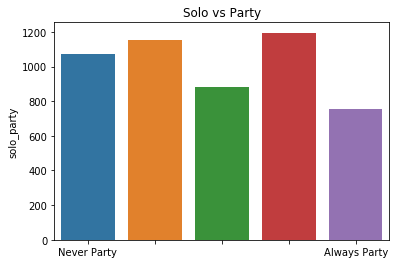

In [452]:
solo = dota.solo_party.value_counts() # 1 always solo, 5 never solo

sns.barplot(x=solo.index, y=solo)
plt.xticks(np.arange(5), ['Never Party', '', '', '', 'Always Party'])
plt.title('Solo vs Party');

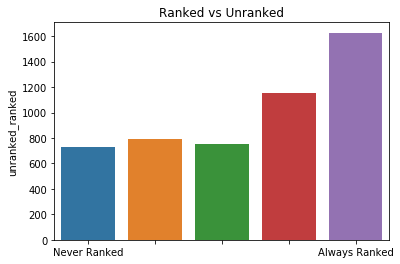

In [453]:
ranked_play = dota.unranked_ranked.value_counts() # 1 never ranked, 5 always ranked

sns.barplot(x=ranked_play.index, y=ranked_play)
plt.xticks(np.arange(5), ['Never Ranked', '', '', '', 'Always Ranked'])
plt.title('Ranked vs Unranked');

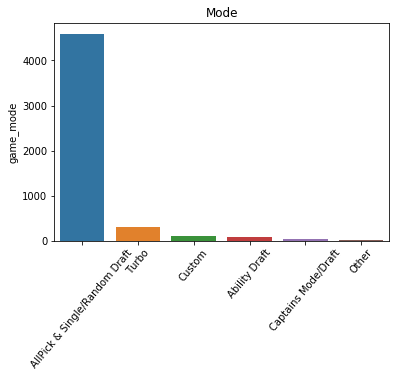

In [454]:
game_mode = dota.game_mode.value_counts()

sns.barplot(x=game_mode.index, y=game_mode)
plt.title('Mode')
plt.xticks(np.arange(6), ['AllPick & Single/Random Draft', 'Turbo', 'Custom', 'Ability Draft', 'Captains Mode/Draft', 'Other'], rotation=50);

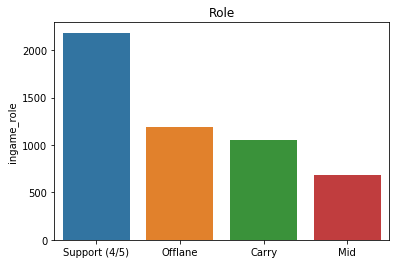

In [455]:
role = dota.ingame_role.value_counts()

sns.barplot(x=role.index, y=role)
plt.title('Role');

### Forum Frequency

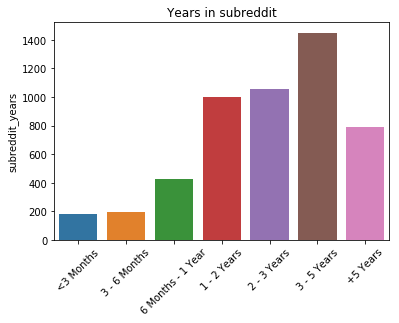

In [456]:
reddit_years = dota.subreddit_years.value_counts()

sns.barplot(x=reddit_years.index, y=reddit_years, order=['<3 Months', '3 - 6 Months', '6 Months - 1 Year', '1 - 2 Years', '2 - 3 Years', '3 - 5 Years', '+5 Years'])
plt.title('Years in subreddit')
plt.xticks(rotation=45)
plt.show()

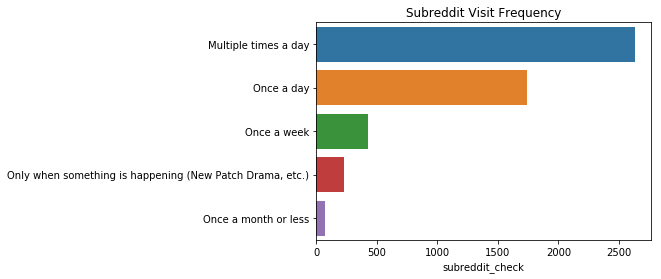

In [457]:
visit_freq = dota.subreddit_check.value_counts()

sns.barplot(x=visit_freq, y=visit_freq.index)
plt.title('Subreddit Visit Frequency');

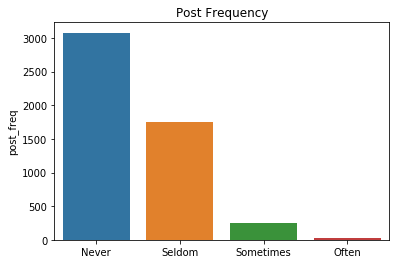

In [458]:
post_freq = dota.post_freq.value_counts()

sns.barplot(x=post_freq.index, y=post_freq, order=['Never', 'Seldom', 'Sometimes', 'Often'])
plt.title('Post Frequency');

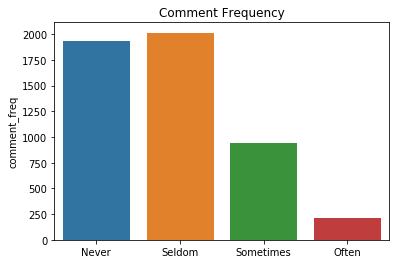

In [459]:
comment_freq = dota.comment_freq.value_counts()

sns.barplot(x=comment_freq.index, y=comment_freq, order=['Never', 'Seldom', 'Sometimes', 'Often'])
plt.title('Comment Frequency');

### Importance Ratings

In [460]:
# Fix disjointed values (either no number or missing text)
dota.loc[dota['patch_news_importance'].str.contains('3'), 'patch_news_importance'] = '3 = Sort of Important'
dota.loc[dota['patch_news_importance'].str.contains('2'), 'patch_news_importance'] = '2 = Sort of Not Important'

dota.loc[2, 'patch_news_importance'] = '4 = Very Important'
dota.loc[0, 'patch_news_importance'] = '4 = Very Important'
dota.loc[1, 'patch_news_importance'] = '3 = Sort of Important'

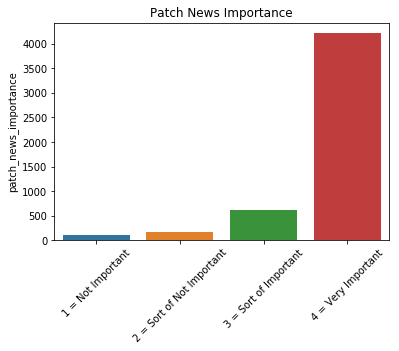

In [461]:
news = dota.patch_news_importance.value_counts()

sns.barplot(x=news.index, y=news, order=['1 = Not Important', '2 = Sort of Not Important', '3 = Sort of Important', '4 = Very Important'])
plt.title('Patch News Importance')
plt.xticks(rotation=45);

In [462]:
# Fix mixed data missing number/text
# dota[dota['bug_reports_importance'] == 'Sort of important']

dota.loc[dota['bug_reports_importance'].str.contains('3'), 'bug_reports_importance'] = '3 = Sort of Important'
dota.loc[dota['bug_reports_importance'].str.contains('2'), 'bug_reports_importance'] = '2 = Sort of Not Important'

dota.loc[2, 'bug_reports_importance'] = '2 = Sort of Not Important'
dota.loc[0, 'bug_reports_importance'] = '2 = Sort of Not Important'
dota.loc[1, 'bug_reports_importance'] = '3 = Sort of Important'

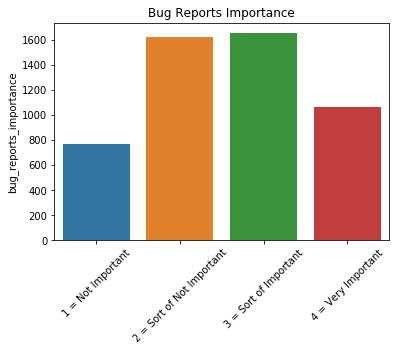

In [463]:
bugs = dota.bug_reports_importance.value_counts() 

sns.barplot(x=bugs.index, y=bugs, order=['1 = Not Important', '2 = Sort of Not Important', '3 = Sort of Important', '4 = Very Important'])
plt.title('Bug Reports Importance')
plt.xticks(rotation=45);

In [464]:
dota.loc[dota['user_created_content_imp'].str.contains('3'), 'user_created_content_imp'] = '3 = Sort of Important'
dota.loc[dota['user_created_content_imp'].str.contains('2'), 'user_created_content_imp'] = '2 = Sort of Not Important'

dota.loc[2, 'user_created_content_imp'] = '3 = Sort of Important'
dota.loc[0, 'user_created_content_imp'] = '3 = Sort of Important'
dota.loc[1, 'user_created_content_imp'] = '3 = Sort of Important'

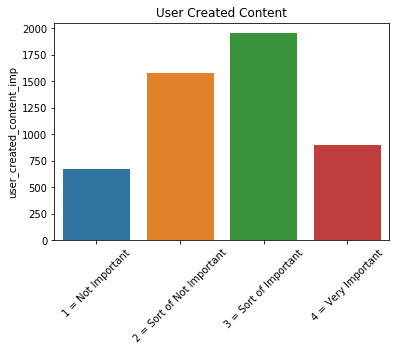

In [465]:
user_content = dota.user_created_content_imp.value_counts() 

sns.barplot(x=user_content.index, y=user_content, order=['1 = Not Important', '2 = Sort of Not Important', '3 = Sort of Important', '4 = Very Important'])
plt.title('User Created Content')
plt.xticks(rotation=45);

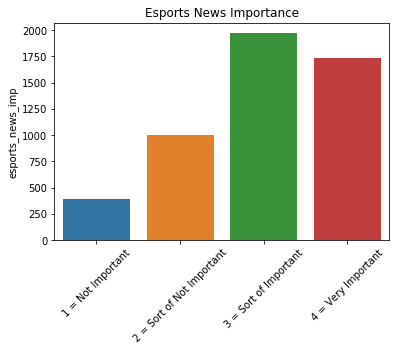

In [466]:
# fix spelling error in column name
dota.rename(columns={'eports_news_imp':'esports_news_imp'}, inplace=True)

# Fix inconsistent values
dota.loc[dota['esports_news_imp'].str.contains('3'), 'esports_news_imp'] = '3 = Sort of Important'
dota.loc[dota['esports_news_imp'].str.contains('2'), 'esports_news_imp'] = '2 = Sort of Not Important'
dota.loc[dota['esports_news_imp'].str.contains('3 Sort of important'), 'esports_news_imp'] = '3 = Sort of Important'



esports_news = dota.esports_news_imp.value_counts() 

sns.barplot(x=esports_news.index, y=esports_news, order=['1 = Not Important', '2 = Sort of Not Important', '3 = Sort of Important', '4 = Very Important'])
plt.title('Esports News Importance')
plt.xticks(rotation=45);

In [467]:
# fix spelling in column name
dota.rename(columns={'gamplay_discuss_imp':'gameplay_discussion_imp'}, inplace=True)

# fix inconsistent values
dota.loc[dota['gameplay_discussion_imp'].str.contains('3'), 'gameplay_discussion_imp'] = '3 = Sort of Important'
dota.loc[dota['gameplay_discussion_imp'].str.contains('2'), 'gameplay_discussion_imp'] = '2 = Sort of Not Important'
dota.loc[dota['gameplay_discussion_imp'].str.contains('Sort of important'), 'gameplay_discussion_imp'] = '3 = Sort of Important'

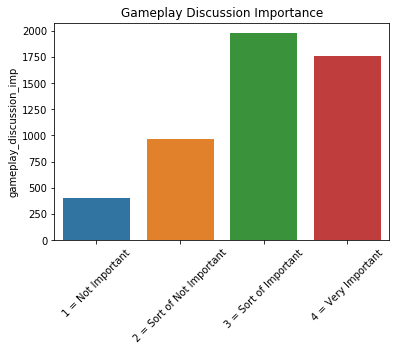

In [468]:
gameplay_discussion_imp = dota.gameplay_discussion_imp.value_counts()


sns.barplot(x=gameplay_discussion_imp.index, y=gameplay_discussion_imp, order=['1 = Not Important', '2 = Sort of Not Important',
                                                                               '3 = Sort of Important', '4 = Very Important'])
plt.title('Gameplay Discussion Importance')
plt.xticks(rotation=45)
plt.show();

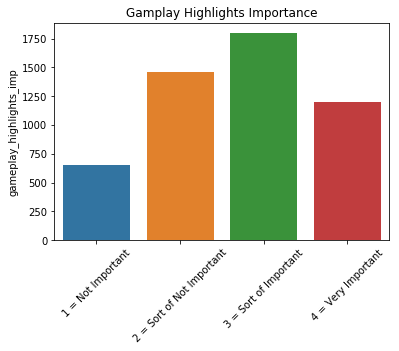

In [469]:
# fix label spelling error
dota.rename(columns={'gamplay_highlights_imp':'gameplay_highlights_imp'}, inplace=True)

# fix inconsistent values
dota.loc[dota['gameplay_highlights_imp'].str.contains('3'), 'gameplay_highlights_imp'] = '3 = Sort of Important'
dota.loc[dota['gameplay_highlights_imp'].str.contains('2'), 'gameplay_highlights_imp'] = '2 = Sort of Not Important'
dota.loc[dota['gameplay_highlights_imp'].str.contains('Sort of important'), 'gameplay_highlights_imp'] = '3 = Sort of Important'

gameplay_highlights_imp = dota.gameplay_highlights_imp.value_counts()

sns.barplot(x=gameplay_highlights_imp.index, y=gameplay_highlights_imp, order=['1 = Not Important', '2 = Sort of Not Important',
                                                                               '3 = Sort of Important', '4 = Very Important'])
plt.title('Gamplay Highlights Importance')
plt.xticks(rotation=45)
plt.show();

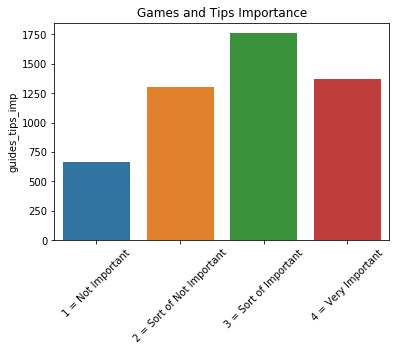

In [470]:
# fix inconsistent values
dota.loc[dota['guides_tips_imp'].str.contains('3'), 'guides_tips_imp'] = '3 = Sort of Important'
dota.loc[dota['guides_tips_imp'].str.contains('2'), 'guides_tips_imp'] = '2 = Sort of Not Important'
dota.loc[dota['guides_tips_imp'].str.contains('Sort of important'), 'guides_tips_imp'] = '3 = Sort of Important'

guides_tips_imp = dota.guides_tips_imp.value_counts()

sns.barplot(x=guides_tips_imp.index, y=guides_tips_imp, order=['1 = Not Important', '2 = Sort of Not Important',
                                                                               '3 = Sort of Important', '4 = Very Important'])
plt.title('Games and Tips Importance')
plt.xticks(rotation=45)
plt.show();

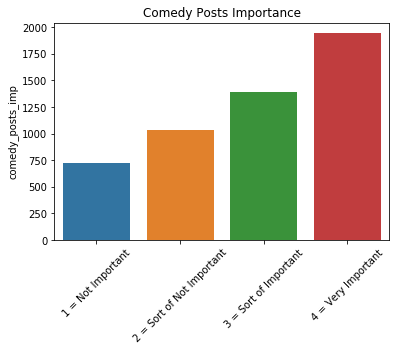

In [471]:
# fix inconsistent values
dota.loc[dota['comedy_posts_imp'].str.contains('3'), 'comedy_posts_imp'] = '3 = Sort of Important'
dota.loc[dota['comedy_posts_imp'].str.contains('2'), 'comedy_posts_imp'] = '2 = Sort of Not Important'
dota.loc[dota['comedy_posts_imp'].str.contains('Sort of important'), 'comedy_posts_imp'] = '3 = Sort of Important'

comedy_posts_imp = dota.comedy_posts_imp.value_counts()

sns.barplot(x=comedy_posts_imp.index, y=comedy_posts_imp, order=['1 = Not Important', '2 = Sort of Not Important',
                                                                               '3 = Sort of Important', '4 = Very Important'])
plt.title('Comedy Posts Importance')
plt.xticks(rotation=45)
plt.show();

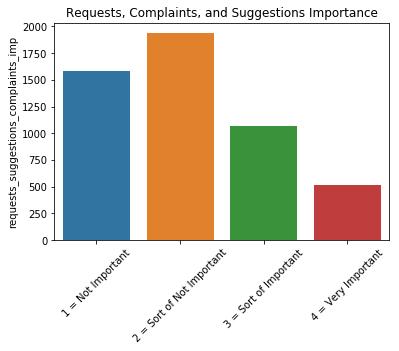

In [472]:
# fix inconsistent values
dota.loc[dota['requests_suggestions_complaints_imp'].str.contains('3'), 'requests_suggestions_complaints_imp'] = '3 = Sort of Important'
dota.loc[dota['requests_suggestions_complaints_imp'].str.contains('2'), 'requests_suggestions_complaints_imp'] = '2 = Sort of Not Important'
dota.loc[dota['requests_suggestions_complaints_imp'].str.contains('Sort of important'), 'requests_suggestions_complaints_imp'] = '3 = Sort of Important'
dota.loc[dota['requests_suggestions_complaints_imp'].str.contains('Sort of not important'), 'requests_suggestions_complaints_imp'] = '2 = Sort of Not Important'


requests_complaints_imp = dota.requests_suggestions_complaints_imp.value_counts()

sns.barplot(x=requests_complaints_imp.index, y=requests_complaints_imp, order=['1 = Not Important', '2 = Sort of Not Important',
                                                                               '3 = Sort of Important', '4 = Very Important'])
plt.title('Requests, Complaints, and Suggestions Importance')
plt.xticks(rotation=45)
plt.show();

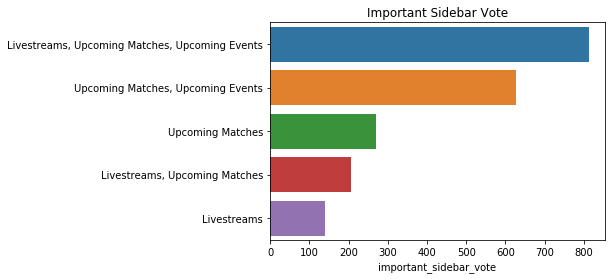

In [473]:
#fix label spelling
dota.rename(columns={'important_sidbar_vote':'important_sidebar_vote'}, inplace=True)

important_sidebar_vote = dota.important_sidebar_vote.value_counts().head()

sns.barplot(x=important_sidebar_vote, y=important_sidebar_vote.index)
plt.title('Important Sidebar Vote')
plt.show()

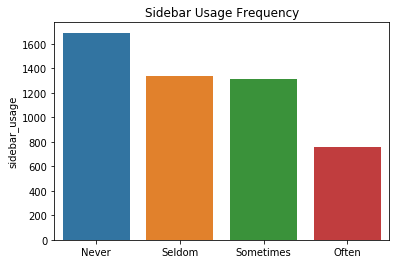

In [474]:
sidebar_usage = dota.sidebar_usage.value_counts()

sns.barplot(x=sidebar_usage.index, y=sidebar_usage)
plt.title('Sidebar Usage Frequency')
plt.show()

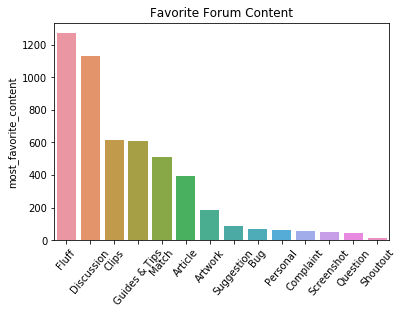

In [475]:
favorite_content = dota.most_favorite_content.value_counts()

sns.barplot(x=favorite_content.index, y=favorite_content)
plt.title('Favorite Forum Content')
plt.xticks(rotation=50);

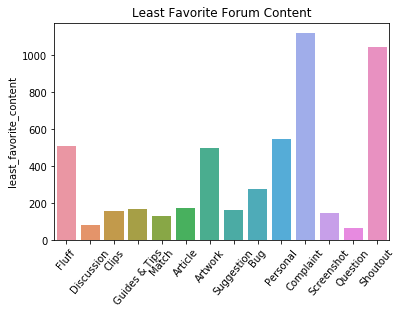

In [476]:
least_fav_content = dota.least_favorite_content.value_counts()

sns.barplot(x=least_fav_content.index, y=least_fav_content, order=['Fluff', 'Discussion', 'Clips', 'Guides & Tips', 'Match', 'Article', 'Artwork', 'Suggestion', 'Bug', 'Personal', 'Complaint', 'Screenshot', 'Question', 'Shoutout'])
plt.title('Least Favorite Forum Content')
plt.xticks(rotation=50);

### 4 Point Ratings

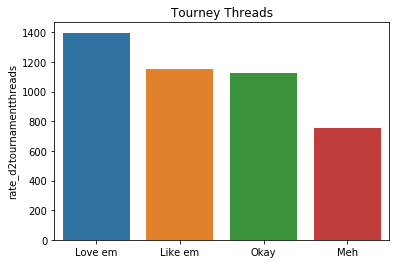

In [477]:
rate_tourney = dota.rate_d2tournamentthreads.value_counts() 

sns.barplot(x=rate_tourney.index, y=rate_tourney, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Tourney Threads');

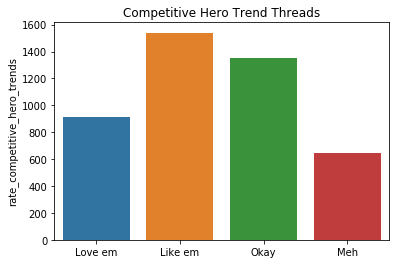

In [478]:
rate_hero_trends = dota.rate_competitive_hero_trends.value_counts() 

sns.barplot(x=rate_hero_trends.index, y=rate_hero_trends, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Competitive Hero Trend Threads'); 

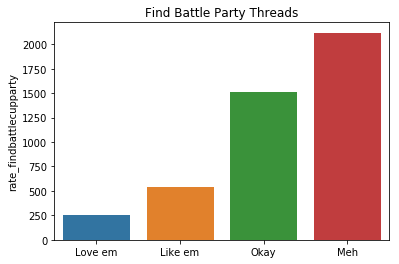

In [479]:
rate_find_party = dota.rate_findbattlecupparty.value_counts() 

sns.barplot(x=rate_find_party.index, y=rate_find_party, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Find Battle Party Threads');

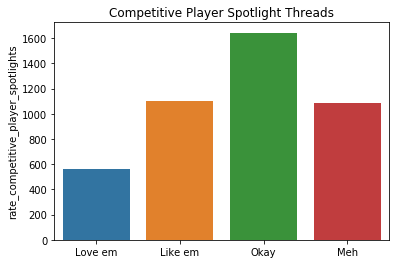

In [480]:
rate_player_spotlights = dota.rate_competitive_player_spotlights.value_counts() 

sns.barplot(x=rate_player_spotlights.index, y=rate_player_spotlights, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Competitive Player Spotlight Threads');

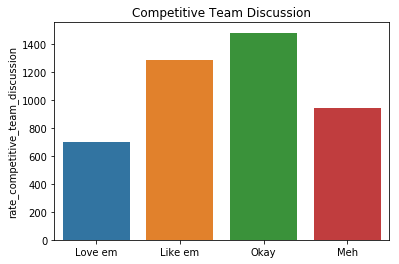

In [481]:
rate_teams = dota.rate_competitive_team_discussion.value_counts() 

sns.barplot(x=rate_teams.index, y=rate_teams, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Competitive Team Discussion');

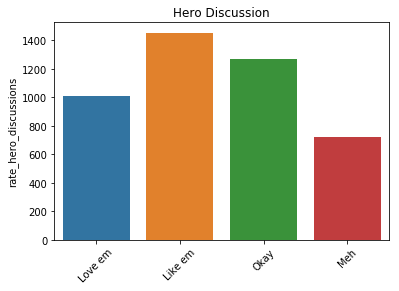

In [482]:
rate_hero_disc = dota.rate_hero_discussions.value_counts() 

sns.barplot(x=rate_hero_disc.index, y=rate_hero_disc, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Hero Discussion')
plt.xticks(rotation=45);

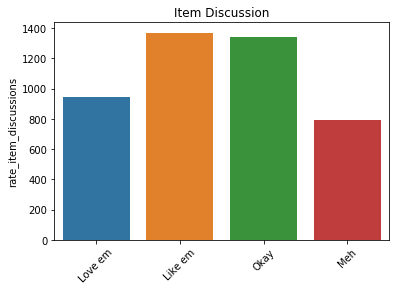

In [483]:
rate_item_disc = dota.rate_item_discussions.value_counts() 

sns.barplot(x=rate_item_disc.index, y=rate_item_disc, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Item Discussion')
plt.xticks(rotation=45);

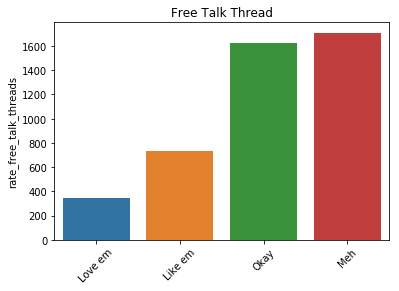

In [484]:
rate_free_talk_thread = dota.rate_free_talk_threads.value_counts() 

sns.barplot(x=rate_free_talk_thread.index, y=rate_free_talk_thread, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Free Talk Thread')
plt.xticks(rotation=45);

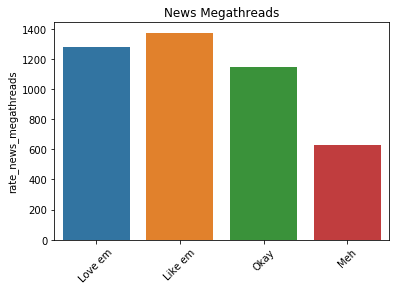

In [485]:
rate_news_megathreads = dota.rate_news_megathreads.value_counts() 

sns.barplot(x=rate_news_megathreads.index, y=rate_news_megathreads, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('News Megathreads')
plt.xticks(rotation=45);

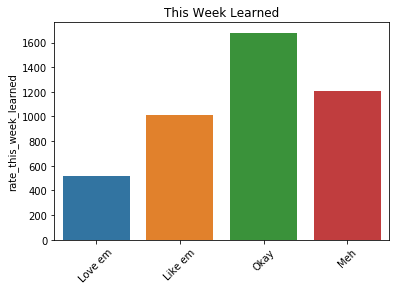

In [486]:
rate_this_week_learned = dota.rate_this_week_learned.value_counts() 

sns.barplot(x=rate_this_week_learned.index, y=rate_this_week_learned, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('This Week Learned')
plt.xticks(rotation=45);

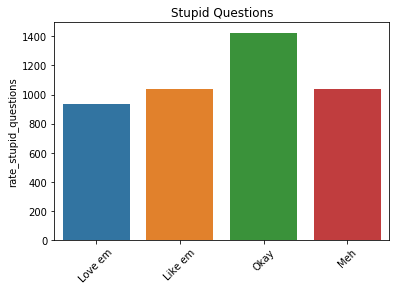

In [487]:
rate_stupid_questions = dota.rate_stupid_questions.value_counts() 

sns.barplot(x=rate_stupid_questions.index, y=rate_stupid_questions, order=['Love em', 'Like em', 'Okay', 'Meh'])
plt.title('Stupid Questions')
plt.xticks(rotation=45);

## Misc

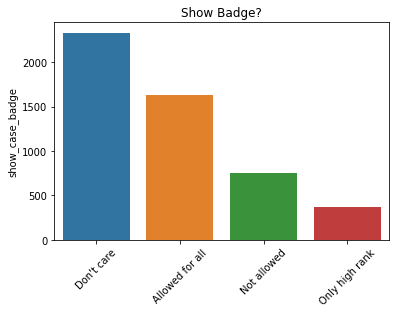

In [488]:
show_badge = dota.show_case_badge.value_counts().head(4) # limit responses in open question

sns.barplot(x=show_badge.index, y=show_badge)
plt.title('Show Badge?')
plt.xticks(np.arange(4), ['Don\'t care', 'Allowed for all', 'Not allowed', 'Only high rank'], rotation=45);

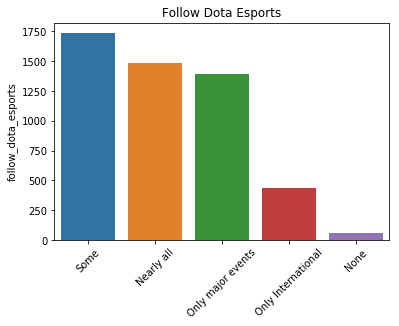

In [489]:
follow_dota_esports = dota.follow_dota_esports.value_counts() 

sns.barplot(x=follow_dota_esports.index, y=follow_dota_esports)
plt.title('Follow Dota Esports')
plt.xticks(np.arange(5), ['Some', 'Nearly all', 'Only major events', 'Only International', 'None'], rotation=45);

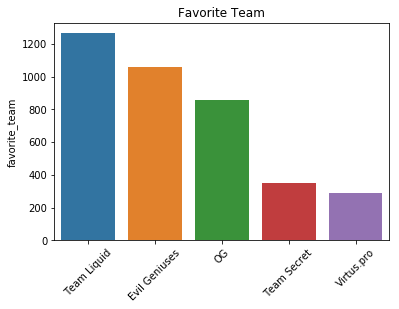

In [490]:
fav_team = dota.favorite_team.value_counts().head()  # take top responses with open question

sns.barplot(x=fav_team.index, y=fav_team)
plt.title('Favorite Team')
plt.xticks(rotation=45);

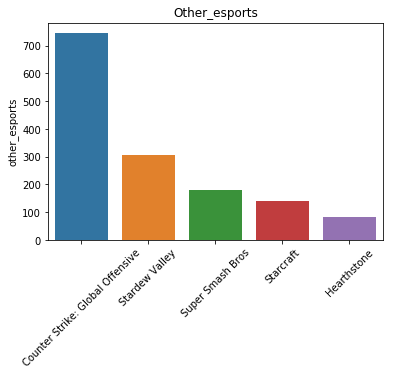

In [491]:
other_esports = dota.other_esports.value_counts().head() 

sns.barplot(x=other_esports.index, y=other_esports)
plt.title('Other_esports')
plt.xticks(rotation=45);

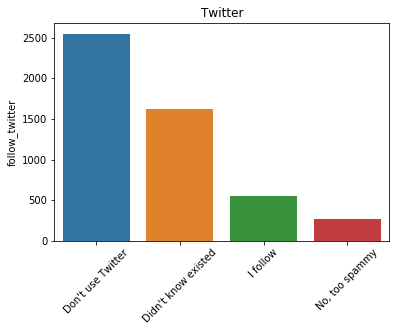

In [492]:
twitter = dota.follow_twitter.value_counts().head(4)

sns.barplot(x=twitter.index, y=twitter)
plt.title('Twitter')
plt.xticks(np.arange(4), ['Don\'t use Twitter', 'Didn\'t know existed', 'I follow', 'No, too spammy'], rotation=45);

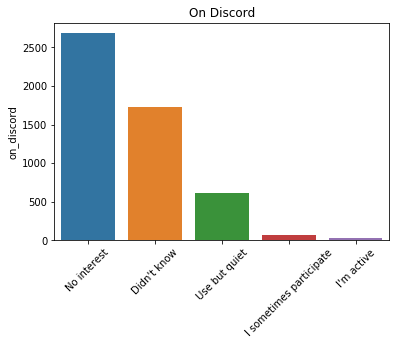

In [493]:
discord = dota.on_discord.value_counts() 

sns.barplot(x=discord.index, y=discord)
plt.title('On Discord')
plt.xticks(np.arange(5), ['No interest', 'Didn\'t know', 'Use but quiet', 'I sometimes participate', 'I\'m active'], rotation=45);

### Stacked Plot

#### 4 Point Questions:

In [494]:
# Create new dfs for just the ratings and importance scale questions
ratings_df = dota[['rate_d2tournamentthreads', 'rate_competitive_hero_trends', 'rate_findbattlecupparty', 
                  'rate_competitive_player_spotlights', 'rate_competitive_team_discussion', 'rate_hero_discussions',
                  'rate_item_discussions', 'rate_free_talk_threads', 'rate_news_megathreads', 'rate_this_week_learned',
                  'rate_stupid_questions']]

importance_df = dota[['patch_news_importance', 'bug_reports_importance', 'user_created_content_imp', 'esports_news_imp',
                             'gameplay_discussion_imp', 'gameplay_highlights_imp', 'guides_tips_imp', 'requests_suggestions_complaints_imp']]


In [495]:
questions = ratings_df.columns
answers = []

for column in ratings_df:
    answers.append(ratings_df[column].value_counts())

In [552]:
ratings_df.head()

,rate_d2tournamentthreads,rate_competitive_hero_trends,rate_findbattlecupparty,rate_competitive_player_spotlights,rate_competitive_team_discussion,rate_hero_discussions,rate_item_discussions,rate_free_talk_threads,rate_news_megathreads,rate_this_week_learned,rate_stupid_questions
0,Love em,Like em,Meh,NaN,Okay,Like em,Like em,Love em,Okay,Like em,Like em
1,Like em,Like em,Like em,Like em,Like em,Like em,Like em,Like em,Like em,Like em,Like em
2,Like em,Okay,Meh,Like em,Like em,Like em,Like em,Okay,Like em,Okay,Okay
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Love em,Okay,Meh,Okay,Like em,Okay,Okay,Meh,Love em,Okay,Okay


In [553]:
df = ratings_df.rate_d2tournamentthreads

In [554]:
df.value_counts()

Love em    1397
Like em    1149
Okay       1124
Meh         757
Name: rate_d2tournamentthreads, dtype: int64

In [562]:
count =df.value_counts()/sum(df.value_counts())

In [565]:
count

Love em    0.315564
Like em    0.259544
Okay       0.253897
Meh        0.170996
Name: rate_d2tournamentthreads, dtype: float64

<BarContainer object of 4 artists>

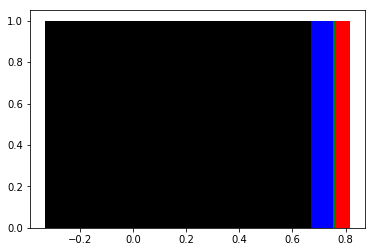

In [575]:
plt.bar(count, 1, width=1, color='rgbky')

In [571]:
dir(count)

['Meh',
 'Okay',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero

TypeError: <lambda>() missing 1 required positional argument: 'height'

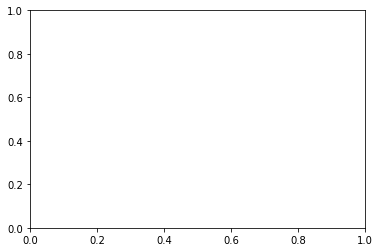

In [561]:
plt.bar(x='rate tourney', y=df.value_counts()/sum(df.value_counts()))

KeyError: ''

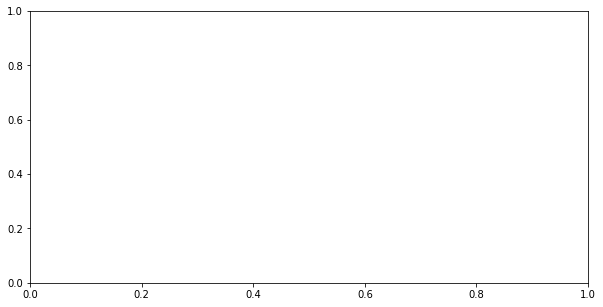

In [497]:
f, ax = plt.subplots(1, figsize=(10,5))

#set bar width
bar_width = 1

# positions of the left bar_boundaries
bar_1 = [i for i in range(len(ratings_df['']))]





## Prep and Cleanup

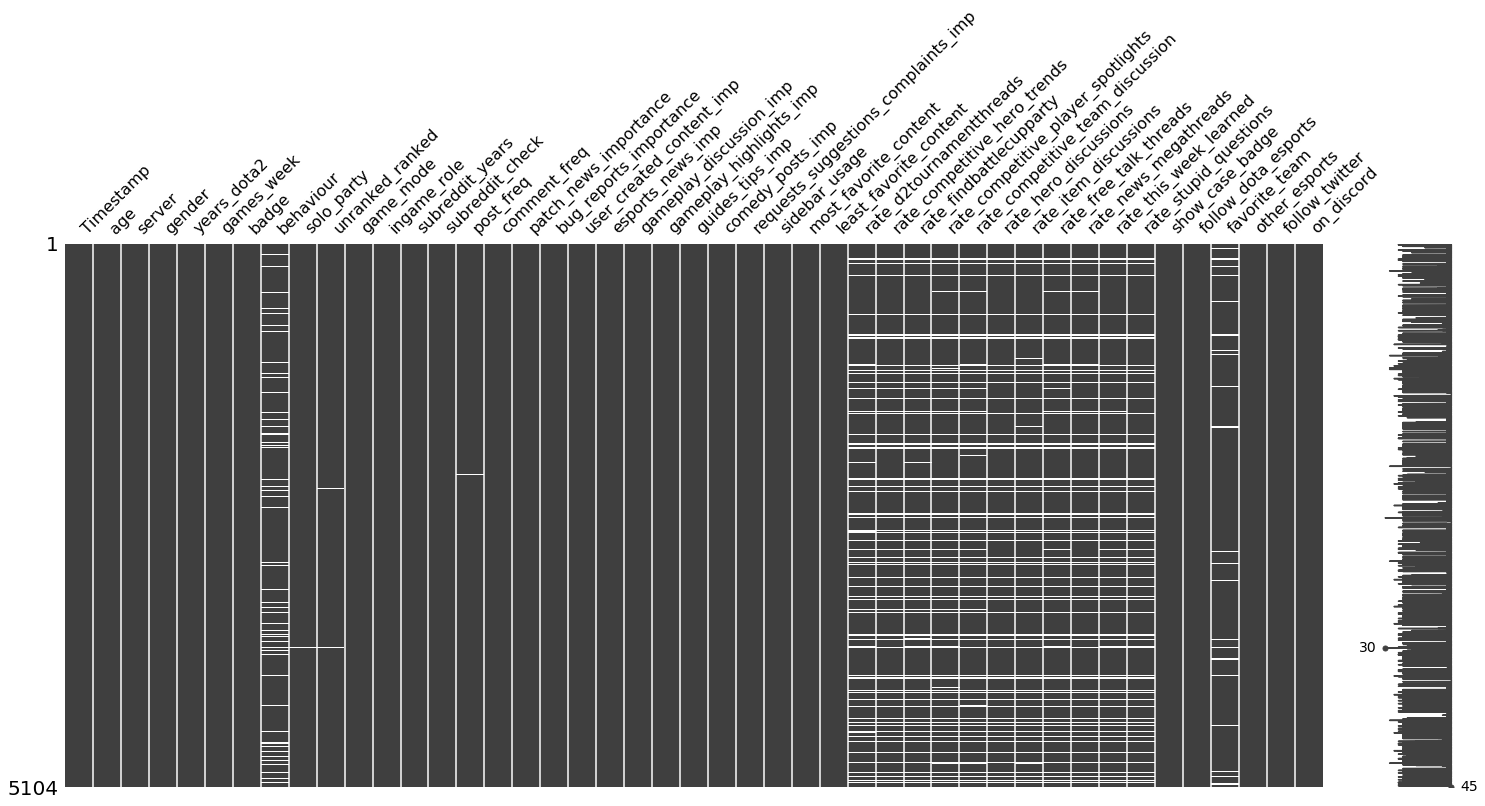

In [520]:
# Look at all missing data
msno.matrix(dota);

In [517]:
dota = dota.drop(columns=['Which version of reddit do most often use when on desktop?', 'important_sidebar_vote', 'Unnamed: 28', 'Unnamed: 42', 
                          'Miscellaneous Feedback - Good things, bad things, anything!']) # drop empty columns/irrelevant rows

dota.other_esports.fillna('None', inplace=True) # replacing missing values with "None"

In [530]:
# drop all rows with missing data in selected column with most missing (700)
dota = dota[pd.notnull(dota['rate_competitive_player_spotlights'])] 

In [536]:
# impute remaining missing values
dota.fillna(dota.mean(), inplace=True)

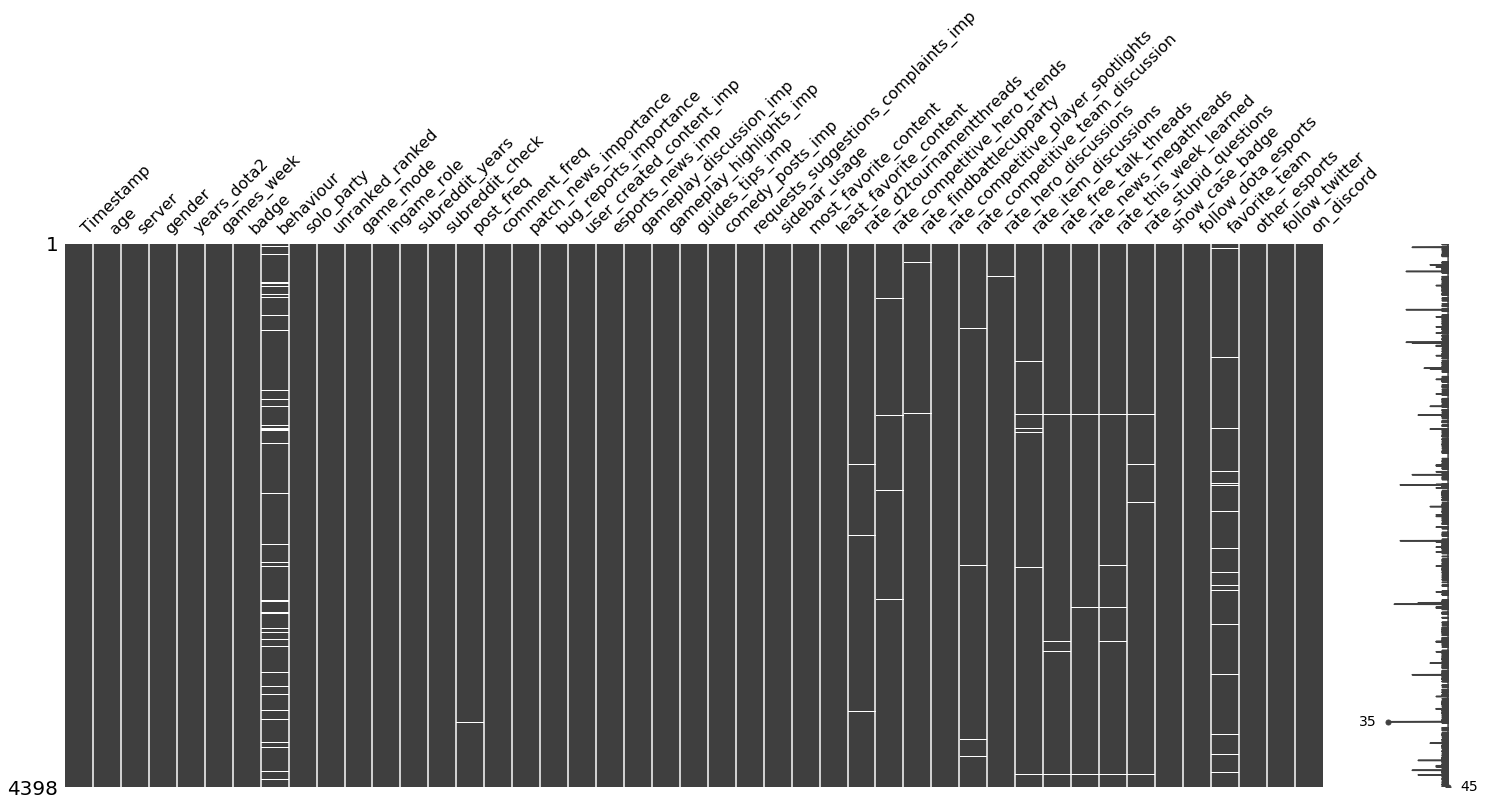

In [537]:
msno.matrix(dota);

In [551]:
dota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 1 to 5103
Data columns (total 45 columns):
Timestamp                              4398 non-null object
age                                    4398 non-null object
server                                 4398 non-null object
gender                                 4398 non-null object
years_dota2                            4398 non-null object
games_week                             4398 non-null object
badge                                  4398 non-null object
behaviour                              4060 non-null object
solo_party                             4398 non-null float64
unranked_ranked                        4398 non-null float64
game_mode                              4398 non-null object
ingame_role                            4398 non-null object
subreddit_years                        4398 non-null object
subreddit_check                        4398 non-null object
post_freq                              4393 non-nul

In [550]:
dota.isnull().sum()

Timestamp                                0
age                                      0
server                                   0
gender                                   0
years_dota2                              0
games_week                               0
badge                                    0
behaviour                              338
solo_party                               0
unranked_ranked                          0
game_mode                                0
ingame_role                              0
subreddit_years                          0
subreddit_check                          0
post_freq                                5
comment_freq                             0
patch_news_importance                    0
bug_reports_importance                   0
user_created_content_imp                 0
esports_news_imp                         0
gameplay_discussion_imp                  0
gameplay_highlights_imp                  0
guides_tips_imp                          0
comedy_post

## PCA

In [436]:
# Transform multi-dimensional dataset into 2 dimensions
pca = PCA(n_components=2, random_state=42)


## Clustering

In [500]:
ss = []

for k in range(2, 11, 1):
    cluster=KMeans(random_state=42, n_clusters=k).fit(dota)
    ss.append(cluster.inertia_)
    
K = range(2,11,1)
sns.pointplot(x=[j for j in K], y=ss)
plt.show()



ValueError: could not convert string to float: "I didn't know there was a Discord server"

 ## Points of interest
 
 * Data is from a reddit survey
 * Primarily all male
 * Played 3-10 years
 * Middle-High skilled in ranked
 * Patch news is very important to almost everyone
 * 
 
 
 * data biased (collected only from reddit, only reddit users, not all Dota2)